В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.
1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*


## Задание №1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
comp_pcs = 7                                            #всего компьютеров
distance_comp_server = []                               #расстояния от компьютеров до сервера в виде массива
distance_comp_comp = []                                 #расстояния между компьютерами в виде массива
distance_switch_server = []                             #расстояния от маршрутизаторов до сервера в виде массива
distance_comp_switch = []                               #расстояния от компьютеров до маршрутизатора в виде массива
optical_cable_cost = 12                                 #стоимость оптоволокна
utp_cable_cost = 30                                     #стоимость витой пары
switch_ports_utp = 8                                    #количество портов rj45 в маршрутизаторе
switch_ports_optical = 1                                #количество оптических портов в маршрутизаторе
switch_cost = 2800                                      #стоимость маршрутизатора
switch_pcs = math.ceil(comp_pcs / switch_ports_utp)     #рассчет необходимого количества маршрутизаторов



$$TF1 = cu \cdot \sum_{i=1}^{n} lcsr_i$$

$$TF2 = (cu \cdot \sum_{i=1}^{n}lcsw_i) + (spcs \cdot cs) + (co \cdot \sum_{i=1}^{n}lcsw_i)$$

$$TF = min(cu \cdot \sum_{i=1}^{n} lcsr_i, (cu \cdot \sum_{i=1}^{n}lcsw_i) + (spcs \cdot cs) + (co \cdot \sum_{i=1}^{n}lswsr_i))$$


n - колличество компьютеров

cu - стоимость витой пары (руб./м)

co - стоимость оптоволокна (руб./м)

cs - стоимость одного маршрутизатора (руб.)

spcs - количество маршрутизаторов

ppcs - количество портов в маршрутизаторе

$lcsr_i$ - массив расстояний от компьютеров до сервера (м.)

$lcsw_i$ - массив расстояний от компьютеров до маршрутизатора (м.)

$lswsr_i$ - массив расстояний от маршрутизаторов до сервера (м.)

## Заполним случайными числами расстояния между компьютерами и сервером

In [3]:
distance_comp_server = [random.randint(70, 140) for i in range(comp_pcs)]

print(distance_comp_server)

[90, 123, 132, 110, 138, 120, 136]


## Заполним случайными числами расстояния между компьютерами  и маршрутизатором

In [4]:
#distance_comp_switch = [[random.randint(5, 20) for j in range(comp_pcs)] for i in range(comp_pcs)]
distance_comp_switch = [random.randint(5, 20) for i in range(comp_pcs)]
print(distance_comp_switch)

[16, 9, 16, 10, 14, 10, 16]


## Заполним случайными числами расстояния между маршрутизатором и сервером
Из диапазона от минимального до среднего значения массива distance_comp_server

In [5]:
distance_switch_server = [random.randint(min(distance_comp_server), math.ceil(np.mean(distance_comp_server))) for i in range(switch_pcs)]

print(distance_switch_server)

[94]


## Рассчитаем стоимость расходов без маршрутизатора
Общяя длина кабеля (витая пара) от компьютеров до сервера

In [6]:
cable_length_comp_serv = sum(distance_comp_server)
print('Общяя длина кабеля (витая пара) составляет: %s м.' %cable_length_comp_serv)

Общяя длина кабеля (витая пара) составляет: 849 м.


Стоимость этого кабеля

In [7]:
cable_cost_comp_serv = cable_length_comp_serv * utp_cable_cost
print('Общяя стоимость кабеля (витая пара) составляет: %s руб.' %cable_cost_comp_serv)

Общяя стоимость кабеля (витая пара) составляет: 25470 руб.


In [8]:
TF1 = sum(distance_comp_server) * utp_cable_cost
print('TF1 =  %s' %TF1)

TF1 =  25470


## Рассчитаем стоимость расходов с маршрутизатором
Общяя длина кабеля (витая пара) от компьютеров до сервера

In [9]:
cable_length_comp_switch = sum(distance_comp_switch)
print('Общяя длина кабеля (витая пара) составляет: %s м.' %cable_length_comp_switch)

Общяя длина кабеля (витая пара) составляет: 91 м.


Стоимость этого кабеля

In [10]:
cable_cost_comp_switch = cable_length_comp_switch * utp_cable_cost
print('Общяя стоимость кабеля (витая пара) составляет: %s руб.' %cable_cost_comp_switch)

Общяя стоимость кабеля (витая пара) составляет: 2730 руб.


Стоимость маршрутизатора(ов)


In [11]:
all_switch_cost = switch_cost * switch_pcs
print('Общяя стоимость маршрутизатора(ов) составляет: %s руб.' %all_switch_cost)

Общяя стоимость маршрутизатора(ов) составляет: 2800 руб.


Общяя длина кабеля (оптоволокно) кабеля от маршрутизаторов до сервера 

In [12]:
cable_length_switch_server = sum(distance_switch_server)
print('Общяя длина кабеля (оптоволокно) составляет: %s м.' %cable_length_switch_server)

Общяя длина кабеля (оптоволокно) составляет: 94 м.


Стоимость кабеля (оптоволокно) от маршрутизаторов до сервера 

In [13]:
cable_cost_switch_serv = cable_length_switch_server * optical_cable_cost
print('Общяя стоимость кабеля (оптоволокно) составляет: %s руб.' %cable_cost_switch_serv)

Общяя стоимость кабеля (оптоволокно) составляет: 1128 руб.


In [14]:
TF2 = (sum(distance_comp_switch) * utp_cable_cost) + (math.ceil(comp_pcs / switch_ports_utp) * switch_cost ) + (sum(distance_switch_server * optical_cable_cost))
print('TF2 =  %s' %TF2)

TF2 =  6658


In [15]:
TF = min(TF1, TF2)
print('Оптимальной является: %s' %('TF1, модель без маршрутизаторов' if TF == TF1 else "TF2, модель с маршрутизаторами"))

Оптимальной является: TF2, модель с маршрутизаторами


## Задание 2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

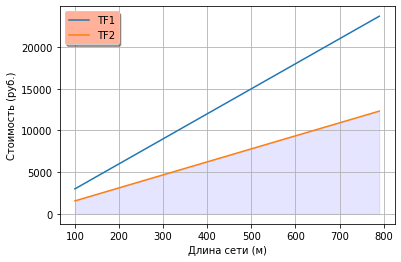

In [16]:
distance_comp_server_f = np.arange(100, 800, 10)   
TF1_f = distance_comp_server_f * utp_cable_cost   
TF2_f = distance_comp_server_f * 0.2 * utp_cable_cost + distance_comp_server_f * 0.8 * optical_cable_cost   
fig, ax = plt.subplots()                                              
ax.plot(distance_comp_server_f, TF1_f)
ax.plot(distance_comp_server_f, TF2_f)
ax.fill_between(distance_comp_server_f,
                TF2_f,
                0,
                color='b',
                alpha=.1)
ax.grid()                                                             
 
lgnd = ax.legend(['TF1', 'TF2'], loc='best', shadow=True)
lgnd.get_frame().set_facecolor('#ffb19a')

ax.set_xlabel('Длина сети (м)')
ax.set_ylabel('Стоимость (руб.)')
 
plt.show()                                                          